Name : Bramha Nimbalkar

Roll no : 7

Div : E

In [101]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


1. Loading of the data 

In [102]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [103]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,NaN,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,NaN,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [104]:
df.shape

(70692, 22)

Data Cleaning 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70690 non-null  float64
 1   HighBP                70682 non-null  float64
 2   HighChol              70664 non-null  float64
 3   CholCheck             70636 non-null  float64
 4   BMI                   70607 non-null  float64
 5   Smoker                70616 non-null  float64
 6   Stroke                70632 non-null  float64
 7   HeartDiseaseorAttack  70644 non-null  float64
 8   PhysActivity          70652 non-null  float64
 9   Fruits                70642 non-null  float64
 10  Veggies               70642 non-null  float64
 11  HvyAlcoholConsump     70646 non-null  float64
 12  AnyHealthcare         70645 non-null  float64
 13  NoDocbcCost           70643 non-null  float64
 14  GenHlth               70646 non-null  float64
 15  MentHlth           

In [106]:
df.isnull().sum()

Diabetes_binary          2
HighBP                  10
HighChol                28
CholCheck               56
BMI                     85
Smoker                  76
Stroke                  60
HeartDiseaseorAttack    48
PhysActivity            40
Fruits                  50
Veggies                 50
HvyAlcoholConsump       46
AnyHealthcare           47
NoDocbcCost             49
GenHlth                 46
MentHlth                43
PhysHlth                35
DiffWalk                34
Sex                     21
Age                     22
Education               13
Income                   8
dtype: int64

Removing columns with low correlation

In [107]:
corre = df.corrwith(df['Diabetes_binary'])

In [108]:
corre

Diabetes_binary         1.000000
HighBP                  0.381560
HighChol                0.289258
CholCheck               0.115440
BMI                     0.293227
Smoker                  0.086035
Stroke                  0.125331
HeartDiseaseorAttack    0.211606
PhysActivity           -0.158512
Fruits                 -0.054111
Veggies                -0.079279
HvyAlcoholConsump      -0.094865
AnyHealthcare           0.023155
NoDocbcCost             0.040914
GenHlth                 0.407551
MentHlth                0.086986
PhysHlth                0.213113
DiffWalk                0.272781
Sex                     0.044470
Age                     0.278931
Education              -0.170571
Income                 -0.224465
dtype: float64

In [109]:
df2=df[['Diabetes_binary','HighBP','HighChol','BMI','Stroke','GenHlth','Age']]

In [110]:
df2.head()

,Diabetes_binary,HighBP,HighChol,BMI,Stroke,GenHlth,Age
0,0.0,1.0,0.0,26.0,0.0,3.0,4.0
1,0.0,1.0,1.0,26.0,1.0,3.0,12.0
2,0.0,0.0,0.0,26.0,0.0,1.0,13.0
3,0.0,1.0,1.0,28.0,0.0,3.0,11.0
4,0.0,0.0,0.0,29.0,0.0,2.0,8.0


In [111]:
df2.isnull().sum()

Diabetes_binary     2
HighBP             10
HighChol           28
BMI                85
Stroke             60
GenHlth            46
Age                22
dtype: int64

In [112]:
df['GenHlth'].unique()

array([ 3.,  1.,  2.,  4., nan,  5.])

Filling the missing values

In [113]:
df2['BMI'] = df2['BMI'].fillna(df['BMI'].mean())
df2['Age'] = df2['Age'].fillna(df['Age'].mean())  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10916\3910421596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BMI'] = df2['BMI'].fillna(df['BMI'].mean())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10916\3910421596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = df2['Age'].fillna(df['Age'].mean())


In [114]:
df2.isnull().sum()

Diabetes_binary     2
HighBP             10
HighChol           28
BMI                 0
Stroke             60
GenHlth            46
Age                 0
dtype: int64

Removing rows with missing binary data

In [115]:
df2=df2.dropna()

In [116]:
df2.isnull().sum()

Diabetes_binary    0
HighBP             0
HighChol           0
BMI                0
Stroke             0
GenHlth            0
Age                0
dtype: int64

2. EDA 

Finding correlation between health parameters (features) and the outcome of disease (labels)

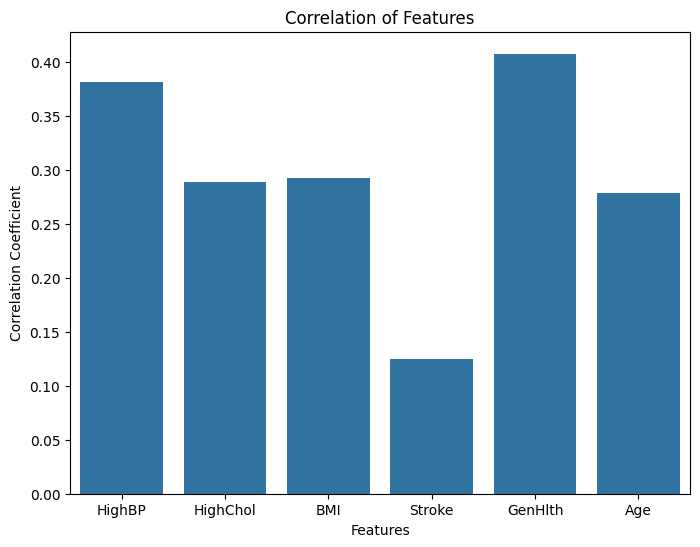

In [117]:
correlation = df2.drop('Diabetes_binary', axis=1).corrwith(df2['Diabetes_binary'])

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [118]:
df2.describe()

,Diabetes_binary,HighBP,HighChol,BMI,Stroke,GenHlth,Age
count,70559.000000,70559.000000,70559.000000,70559.000000,70559.000000,70559.000000,70559.000000
mean,0.500942,0.563939,0.525971,29.865466,0.062274,2.837852,8.585735
std,0.500003,0.495898,0.499329,7.112184,0.241654,1.113527,2.850851
min,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,2.000000,7.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,3.000000,9.000000
75%,1.000000,1.000000,1.000000,33.000000,0.000000,4.000000,11.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,5.000000,13.000000


3. Visualize distributions of key features and their impact on diabetes risk

In [119]:
import matplotlib.pyplot as plt

Feature distribution in terms of observation of the overall dataset

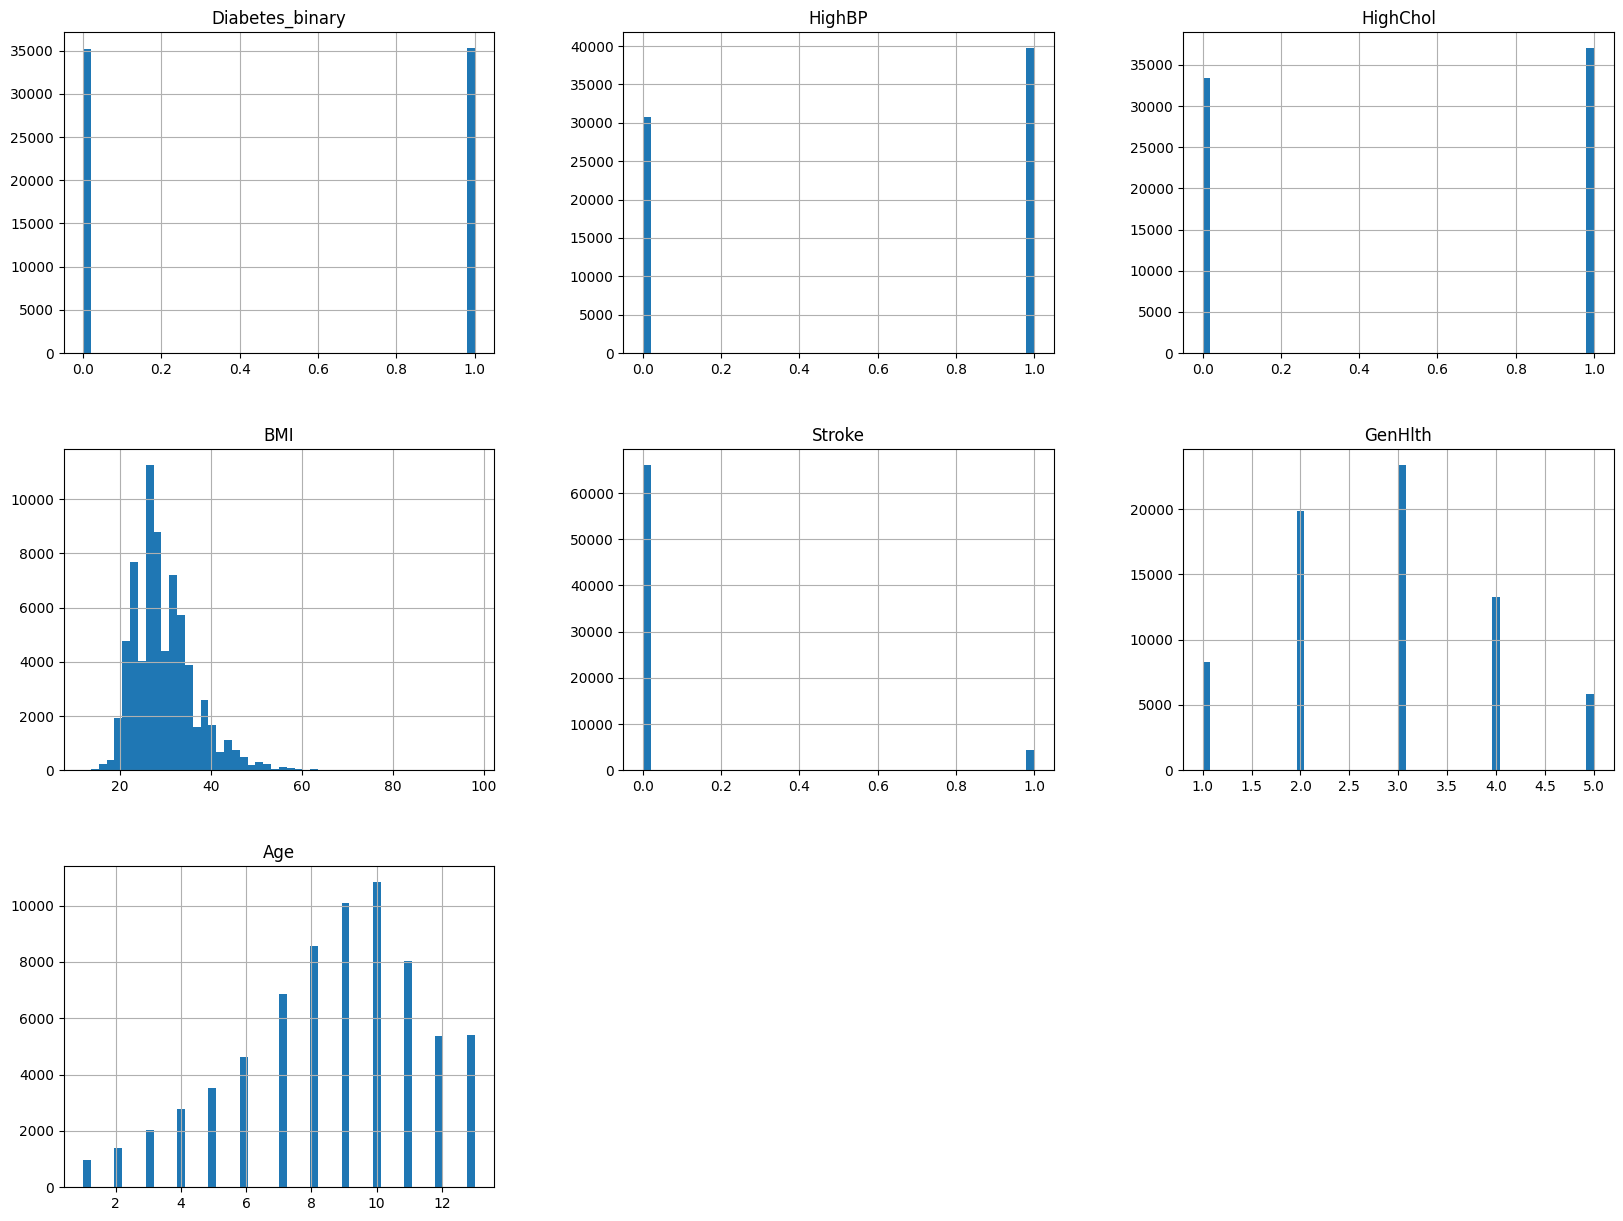

In [120]:
df2.hist(bins=50,figsize=(20,15))
plt.show()

Feature distribution in terms of observation of the patients without diabetes

In [121]:
nodib_df=df2[df2['Diabetes_binary']==0.0]

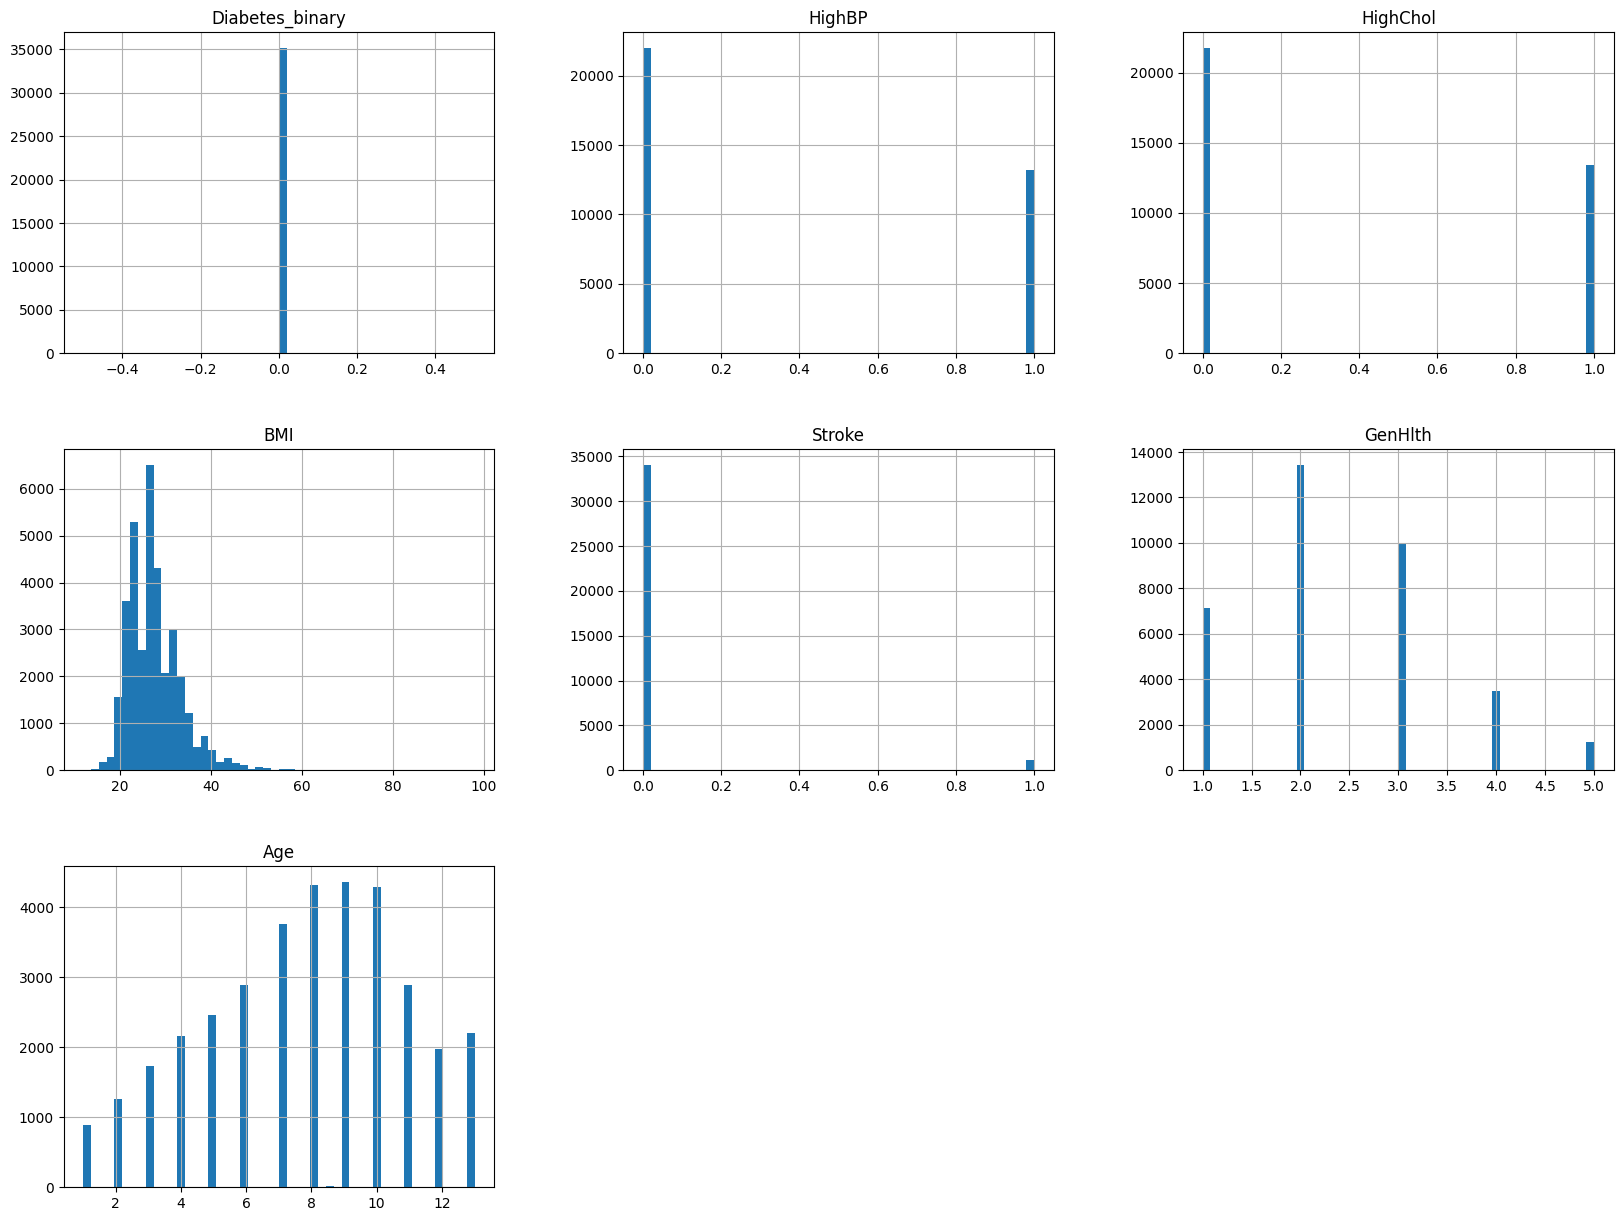

In [122]:
nodib_df.hist(bins=50,figsize=(20,15))
plt.show()

Feature distribution in terms of observation of the patients with diabetes

In [123]:
dib_df=df2[df2['Diabetes_binary']==1.0]

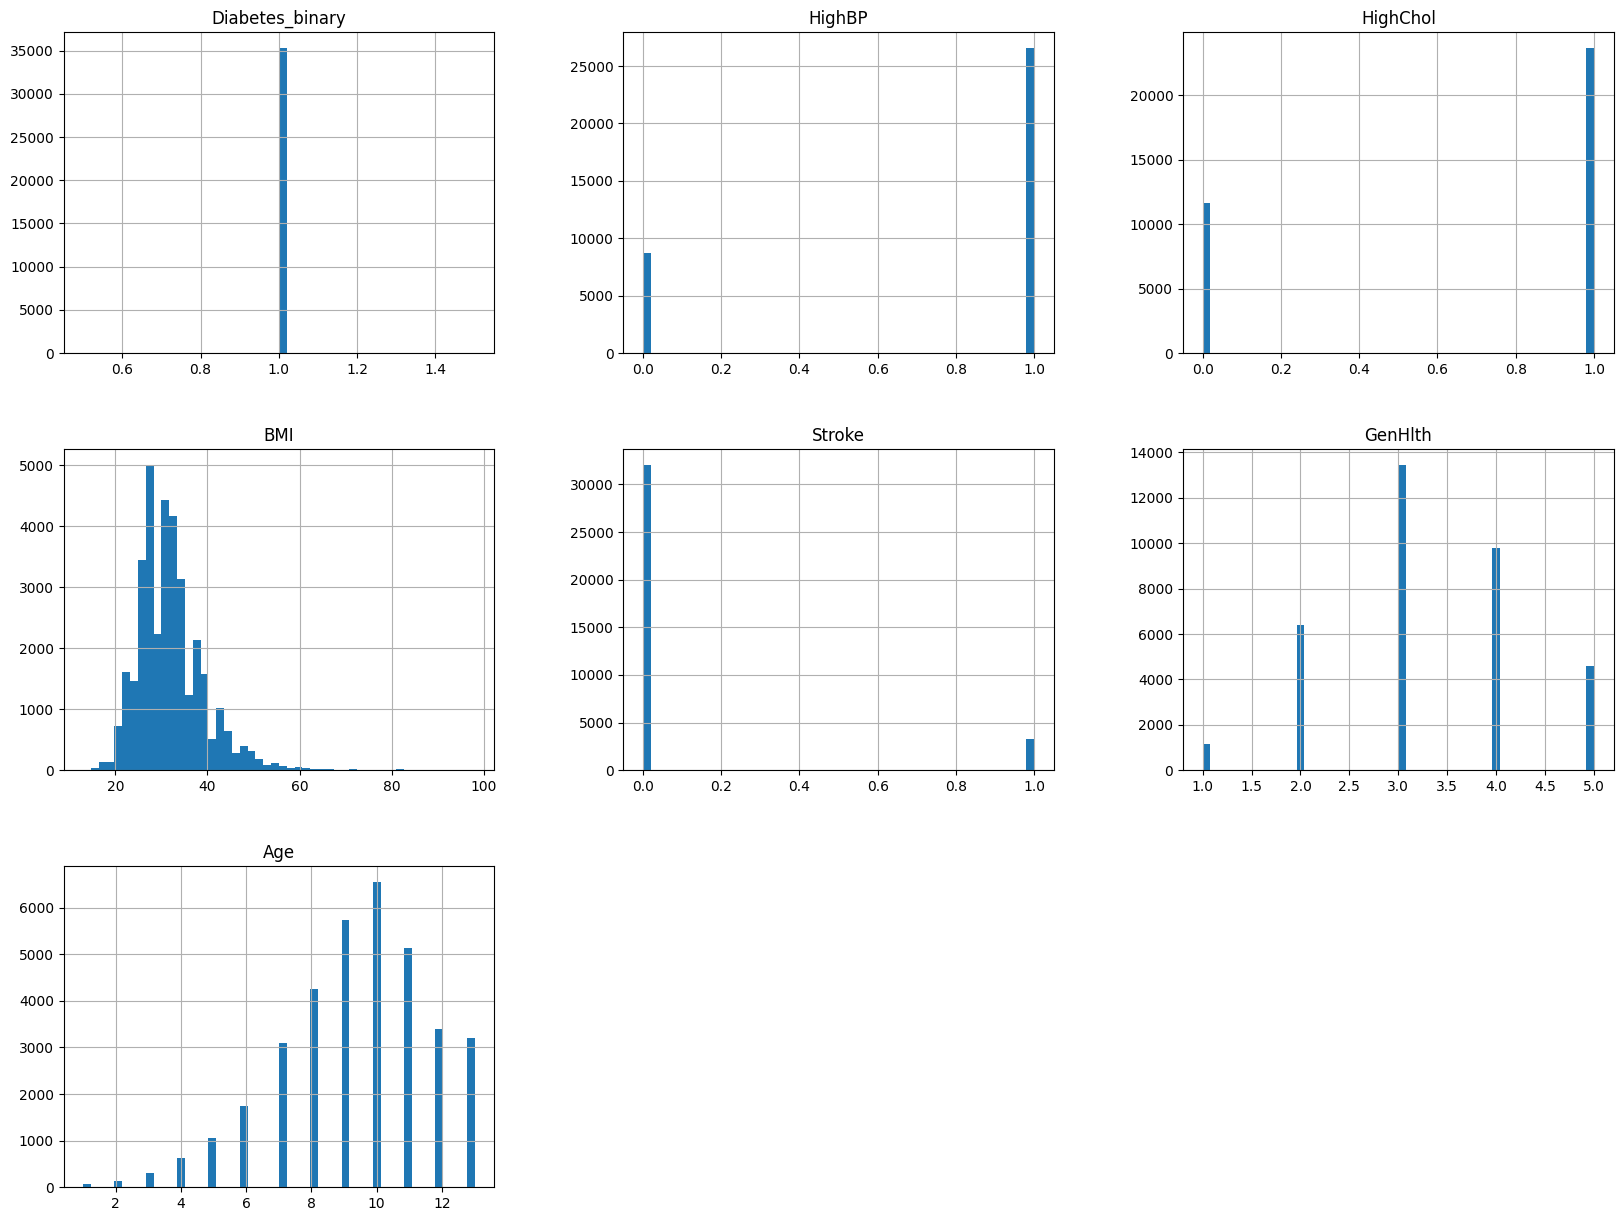

In [124]:
dib_df.hist(bins=50,figsize=(20,15))
plt.show()

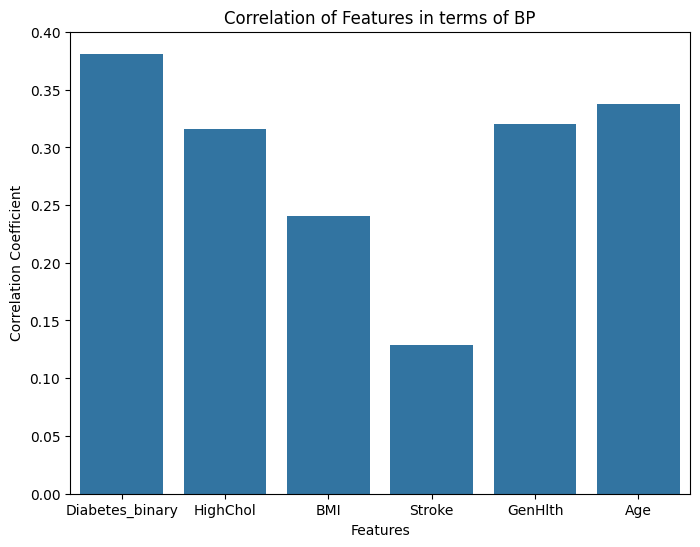

In [125]:
correlation = df2.drop('HighBP', axis=1).corrwith(df2['HighBP'])

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features in terms of BP')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

4. Apply statistical tests to identify significant correlations between variables.

In [146]:
pearson_corr, pearson_p_value = pearsonr(df2['HighBP'], df2['Diabetes_binary'])
print(f"Pearson correlation between HighBP and Diabetes_binary: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['HighChol'], df2['Diabetes_binary'])
print(f"Pearson correlation between HighChol and Diabetes_binary: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['BMI'], df2['Diabetes_binary'])
print(f"Pearson correlation between BMI and Diabetes_binary: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['BMI'], df2['HighBP'])
print(f"Pearson correlation between BMI and HighBP: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['Age'], df2['HighBP'])
print(f"Pearson correlation between Age and HighBP: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['HighChol'], df2['HighBP'])
print(f"Pearson correlation between HighChol and HighBP: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['Stroke'], df2['HighBP'])
print(f"Pearson correlation between Stroke and HighBP: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['HighChol'], df2['Age'])
print(f"Pearson correlation between HighChol and Age: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['HighChol'], df2['Stroke'])
print(f"Pearson correlation between HighChol and Stroke: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['GenHlth'], df2['Age'])
print(f"Pearson correlation between GenHlth and Age: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

pearson_corr, pearson_p_value = pearsonr(df2['BMI'], df2['Diabetes_binary'])
print(f"Pearson correlation between BMI and Diabetes_binary: {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")



Pearson correlation between HighBP and Diabetes_binary: 0.3813
P-value: 0.0000
Pearson correlation between HighChol and Diabetes_binary: 0.2892
P-value: 0.0000
Pearson correlation between BMI and Diabetes_binary: 0.2928
P-value: 0.0000
Pearson correlation between BMI and HighBP: 0.2402
P-value: 0.0000
Pearson correlation between Age and HighBP: 0.3379
P-value: 0.0000
Pearson correlation between HighChol and HighBP: 0.3161
P-value: 0.0000
Pearson correlation between Stroke and HighBP: 0.1289
P-value: 0.0000
Pearson correlation between HighChol and Age: 0.2400
P-value: 0.0000
Pearson correlation between HighChol and Stroke: 0.0997
P-value: 0.0000
Pearson correlation between GenHlth and Age: 0.1557
P-value: 0.0000
Pearson correlation between BMI and Diabetes_binary: 0.2928
P-value: 0.0000


5. Discuss the implications of the EDA findings.

We can see that in the given dataset there were total 21 columns used as the features to find whether a given patient is diabetic or not denoted by 0 and 1 (0 for not daibetic and 1 for being daibetic).

In which we first tried to find the correlation between the labels and given features of the dataset, from which it was understood that certioan features such as MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income, CholCheck, Smoker, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost are less important in findind whether a patient is diabetic, therefore discarding them from the dataset.

Then the missing values in this dataset where replaced with mean for the features BMI and Age as these two features can be similar for a population. And the other features with the binary missing values were dealt by removing the rows with missing data as finding mean or median for them could have the impact of changing the outcome.

The visualizations represent the distribution of features with respect to the observations, in which the graphs for the overall dataset show that number of patients having high BP and High cholestrol is high irrespective of a patient being diabetic or not. We can also indentify that BMI is around 30 for more than 10,000 patients. Patients suffering with stroke is significantly low, less than 5000 and the general health scale is 2 and 3 for maximum population, thus describing there overall health status. Age of the maximim patiens seems to be 9 in the given dataset.

From the graphs for the patients with diabetes and without diabetes, we can identify relationship between various features of the dataset.
We can see that the patients suffering from diabetes seem to have high BP and high cholestrol compared to the ones not suffering. BMI does not seem to play a significant role in this as both daibetic and non-diabetic patients have nearly similar BMI. Stroke do not have a signification relationship with diabetes as theres just slight increase in the number of people having stroke while having diabetes compared to those not being diabetic. General health scale for people without diabetes is 2 whereas with diabetes is 3 for maximum people. Key insight is that the maximum patients suffering from diabetes are of age 10, which lead us to think that what are the factors that lead the patients with 10 years of age to High BP and Diabetes, thus there seems a very strong relationship between the two(0.3813). High BP also seems to have a strong relationship with other features within the dataset.

This analysis leads us to think that what makes the diabetic patients to suffer from the high BP at such a younger age. Also this shows that diabetes is not necessarily the reason for strokes in the patients. And find the cause if the high BP and cholestrol the main reason behind people suffering at a younger age with such disease.


  



